In [ ]:
import re
from nltk import corpus
from nltk import WhitespaceTokenizer
from nltk import WordNetLemmatizer
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
#helper functions
lemmatizer = WordNetLemmatizer()
w_tokenizer = WhitespaceTokenizer()
def stringify(text):
  finallist = ''
  for i in range(len(text)):
    if i + 1 == len(text):
      finallist += text[i]
    else:
      finallist += text[i] + ' '
  return finallist

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def tokenizer(text):
  return w_tokenizer.tokenize(text)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})
    plt.show()


### Phase 1: Build NB Model on full data

In [ ]:
#load data
train = pd.read_csv('train_data_imbalanced_stratified_no_dupe_136k_40k.csv')
test = pd.read_csv("test_data_imbalanced_stratified_no_dupe.csv")

In [ ]:
trained_x = train['text']
trained_y = train['emotions']
val_x = test['text']
val_y = test['emotions']

In [ ]:
count_vectorizer_1 = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train_1 = count_vectorizer_1.fit_transform(trained_x.values.astype('U'))
test_1 = count_vectorizer_1.transform(val_x.values.astype('U'))
model = MultinomialNB()
model.fit(train_1, trained_y)

MultinomialNB()

In [ ]:
print('Train size: ',train_1.shape)
print('Test size: ',test_1.shape)

Train size:  (136657, 23359)
Test size:  (37961, 23359)


              precision    recall  f1-score   support

       anger    0.92605   0.89858   0.91211      5226
        fear    0.92903   0.88698   0.90752      3955
         joy    0.88508   0.94263   0.91295     12917
        love    0.88889   0.77568   0.82843      2434
     neutral    0.94516   0.34070   0.50085       860
     sadness    0.88776   0.94951   0.91760     11587
    surprise    0.92264   0.49796   0.64683       982

    accuracy                        0.89703     37961
   macro avg    0.91209   0.75601   0.80376     37961
weighted avg    0.89869   0.89703   0.89205     37961



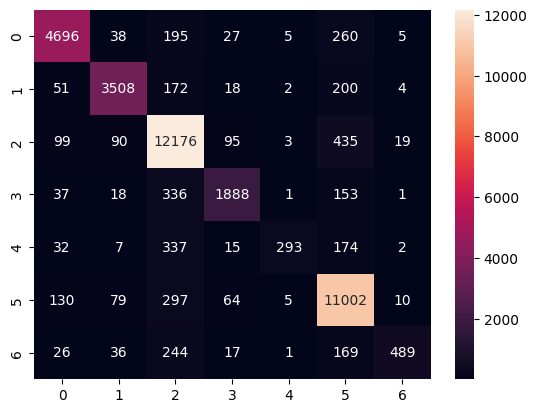

In [ ]:
y_pred = model.predict(test_1)

print(classification_report(val_y, y_pred,  digits=5))
plot_confusion_matrix(val_y, y_pred)

### Phase 1: Build NB model on subset of full data
Training with 17k worth of data, just like we'd pass into BERT

In [ ]:
train = pd.read_csv('train_data_imbalanced_stratified_no_dupe_17k_5k.csv')
test = pd.read_csv("test_data_imbalanced_stratified_no_dupe.csv")

In [ ]:
trained_x = train['text']
trained_y = train['emotions']
val_x = test['text']
val_y = test['emotions']

In [ ]:
count_vectorizer_1 = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train_1 = count_vectorizer_1.fit_transform(trained_x.values.astype('U'))
test_1 = count_vectorizer_1.transform(val_x.values.astype('U'))
model = MultinomialNB()
model.fit(train_1, trained_y)

MultinomialNB()

In [ ]:
print('Train size: ',train_1.shape)
print('Test size: ',test_1.shape)

Train size:  (17082, 7575)
Test size:  (37961, 7575)


              precision    recall  f1-score   support

       anger    0.90305   0.80387   0.85058      5226
        fear    0.90607   0.73654   0.81255      3955
         joy    0.81231   0.93381   0.86883     12917
        love    0.87960   0.54026   0.66938      2434
     neutral    0.93636   0.11977   0.21237       860
     sadness    0.80796   0.93752   0.86793     11587
    surprise    0.90769   0.18024   0.30076       982

    accuracy                        0.83333     37961
   macro avg    0.87901   0.60743   0.65463     37961
weighted avg    0.84283   0.83333   0.81782     37961



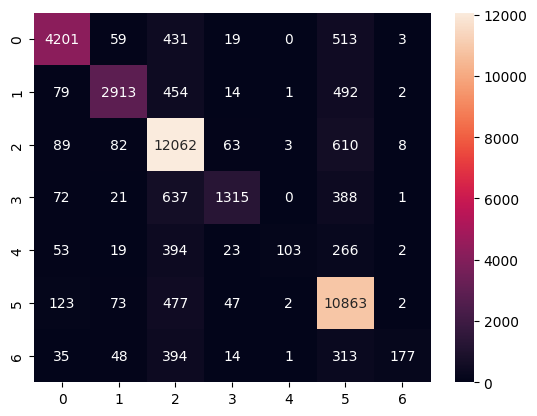

In [ ]:
y_pred = model.predict(test_1)

print(classification_report(val_y, y_pred,  digits=5))
plot_confusion_matrix(val_y, y_pred)

### Phase 1: Build NB model with only lexicon words
Filter out training and test set to only include words present in lexicon

In [ ]:
train = pd.read_csv('train_data_imbalanced_stratified_no_dupe_136k_40k.csv')
lexicon = pd.read_csv("lexicon_220306.csv")
test = pd.read_csv("test_data_imbalanced_stratified_no_dupe.csv")

In [ ]:
lexicon_word_list  = lexicon['cleaned_stopwords'].tolist()
#lexicon_word_list

In [ ]:
train['tokenized'] = train['text'].apply(tokenizer)
train['lexiconned'] = train['tokenized'].apply(lambda x: [word for word in x if word in (lexicon_word_list)])

In [ ]:
test['tokenized'] = test['text'].apply(tokenizer)
test['lexiconned'] = test['tokenized'].apply(lambda x: [word for word in x if word in (lexicon_word_list)])


In [ ]:
train['stringed'] = train['lexiconned'].apply(stringify)
test['stringed']= test['lexiconned'].apply(stringify)
train_x = train['stringed']
train_y = train['emotions']
test_x = test['stringed']
test_y = test['emotions']

In [ ]:
count_vectorizer = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train = count_vectorizer.fit_transform(train_x.values.astype('U'))
test = count_vectorizer.transform(test_x.values.astype('U'))

In [ ]:
print('Train size: ',train.shape)
print('Test size: ',test.shape)

Train size:  (136657, 449)
Test size:  (37961, 449)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train, train_y)

MultinomialNB()

              precision    recall  f1-score   support

       anger    0.96309   0.88366   0.92166      5226
        fear    0.95535   0.91960   0.93713      3955
         joy    0.83617   0.97244   0.89917     12917
        love    0.95684   0.91085   0.93328      2434
     neutral    0.01587   0.00116   0.00217       860
     sadness    0.96848   0.91758   0.94234     11587
    surprise    0.94995   0.94705   0.94850       982

    accuracy                        0.91136     37961
   macro avg    0.80654   0.79319   0.79775     37961
weighted avg    0.89854   0.91136   0.90254     37961



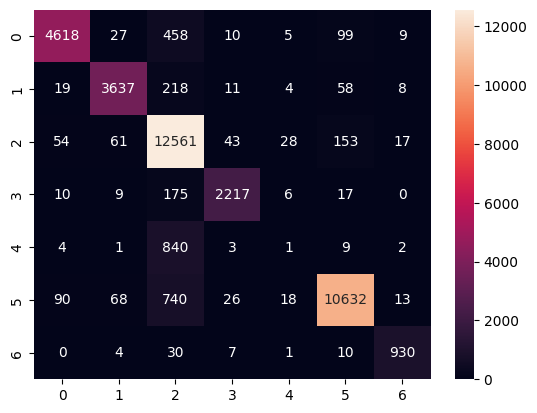

In [ ]:
y_pred = nb.predict(test)
print(classification_report(test_y, y_pred,  digits=5))
plot_confusion_matrix(test_y, y_pred)

### Phase 1: Build NB with Reverse Lexicon
Filter out words present in lexicon from training and test set

In [ ]:
train = pd.read_csv('train_data_imbalanced_stratified_no_dupe_136k_40k.csv')
lexicon = pd.read_csv("lexicon_220306.csv")
test = pd.read_csv("test_data_imbalanced_stratified_no_dupe.csv")

In [ ]:
lexicon_word_list  = lexicon['cleaned_stopwords'].tolist()

In [ ]:
train['tokenized'] = train['text'].apply(tokenizer)
train['lexiconned'] = train['tokenized'].apply(lambda x: [word for word in x if word not in (lexicon_word_list)])

In [ ]:
train.head()

,Unnamed: 0,text,emotions,tokenized,lexiconned
0,13339,@Senfaye Me too. I found out about it a little...,fear,"[@Senfaye, Me, too., I, found, out, about, it,...","[@Senfaye, Me, too., I, found, out, about, it,..."
1,134408,i often felt sorry for myself and would feel e...,anger,"[i, often, felt, sorry, for, myself, and, woul...","[i, often, felt, for, myself, and, would, feel..."
2,90268,i didnt went to work today as i feel so low in...,sadness,"[i, didnt, went, to, work, today, as, i, feel,...","[i, didnt, went, to, work, today, as, i, feel,..."
3,6736,"Oh god, a moth was living in a fucking power o...",anger,"[Oh, god,, a, moth, was, living, in, a, fuckin...","[Oh, god,, a, moth, was, living, in, a, fuckin..."
4,18385,i don t want anyone feeling uncomfortable,fear,"[i, don, t, want, anyone, feeling, uncomfortable]","[i, don, t, want, anyone, feeling]"


In [ ]:
test['tokenized'] = test['text'].apply(tokenizer)
test['lexiconned'] = test['tokenized'].apply(lambda x: [word for word in x if word not in (lexicon_word_list)])


In [ ]:
train['stringed'] = train['lexiconned'].apply(stringify)
test['stringed']= test['lexiconned'].apply(stringify)
train_x = train['stringed']
train_y = train['emotions']
test_x = test['stringed']
test_y = test['emotions']

In [ ]:
count_vectorizer = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train = count_vectorizer.fit_transform(train_x.values.astype('U'))
test = count_vectorizer.transform(test_x.values.astype('U'))

In [ ]:
nb = MultinomialNB()
nb.fit(train, train_y)

MultinomialNB()

              precision    recall  f1-score   support

       anger    0.38350   0.17700   0.24221      5226
        fear    0.33824   0.10468   0.15988      3955
         joy    0.49200   0.64473   0.55810     12917
        love    0.31663   0.10641   0.15929      2434
     neutral    0.93684   0.31047   0.46638       860
     sadness    0.42355   0.59222   0.49388     11587
    surprise    0.12766   0.01222   0.02230       982

    accuracy                        0.44959     37961
   macro avg    0.43120   0.27825   0.30029     37961
weighted avg    0.42956   0.44959   0.41201     37961



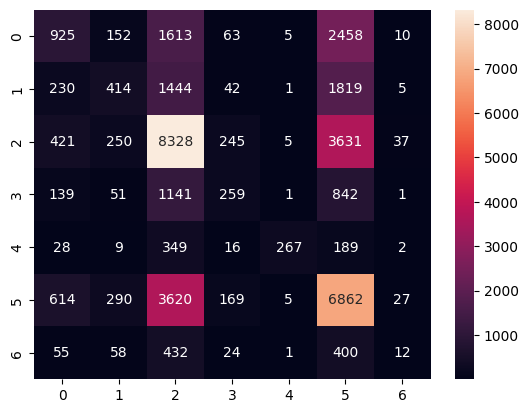

In [ ]:
y_pred = nb.predict(test)
print(classification_report(test_y, y_pred,  digits=5))
plot_confusion_matrix(test_y, y_pred)

### Phase 3:
Now we try NB model on a mixture of CARER and kaggle data with no lexicon filtering.

In [ ]:
train = pd.read_csv('train_20k_12k_mixed_strat_clean_kaggle_230404.csv')
test = pd.read_csv("test_data_imbalanced_stratified_no_dupe.csv")

In [ ]:
trained_x = train['text']
trained_y = train['emotions']
val_x = test['text']
val_y = test['emotions']

In [ ]:
count_vectorizer_1 = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train_1 = count_vectorizer_1.fit_transform(trained_x.values.astype('U'))
test_1 = count_vectorizer_1.transform(val_x.values.astype('U'))
model = MultinomialNB()
model.fit(train_1, trained_y)

MultinomialNB()

In [ ]:
print('Train size: ',train_1.shape)
print('Test size: ',test_1.shape)

Train size:  (20535, 9067)
Test size:  (37961, 9067)


              precision    recall  f1-score   support

       anger    0.90611   0.68695   0.78145      5226
        fear    0.82404   0.69507   0.75408      3955
         joy    0.80415   0.92026   0.85830     12917
        love    0.87902   0.37017   0.52096      2434
     neutral    0.97173   0.31977   0.48119       860
     sadness    0.75066   0.93665   0.83340     11587
    surprise    0.92174   0.10794   0.19325       982

    accuracy                        0.79979     37961
   macro avg    0.86535   0.57669   0.63181     37961
weighted avg    0.81557   0.79979   0.78189     37961



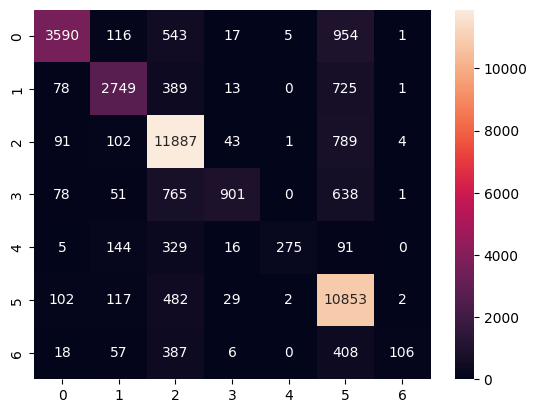

In [ ]:
y_pred = model.predict(test_1)

print(classification_report(val_y, y_pred,  digits=5))
plot_confusion_matrix(val_y, y_pred)